✅ Dataset Loaded Successfully!
Dataset Shape: (260, 8)
                      Title  IMDb Rating  \
0  The Shawshank Redemption          9.3   
1             The Godfather          9.2   
2     The Godfather Part II          9.0   
3          Schindler's List          9.0   
4              12 Angry Men          9.0   

                                                Plot  
0  A banker convicted of uxoricide forms a friend...  
1  The aging patriarch of an organized crime dyna...  
2  The early life and career of Vito Corleone in ...  
3  In German-occupied Poland during World War II,...  
4  The jury in a New York City murder trial is fr...  


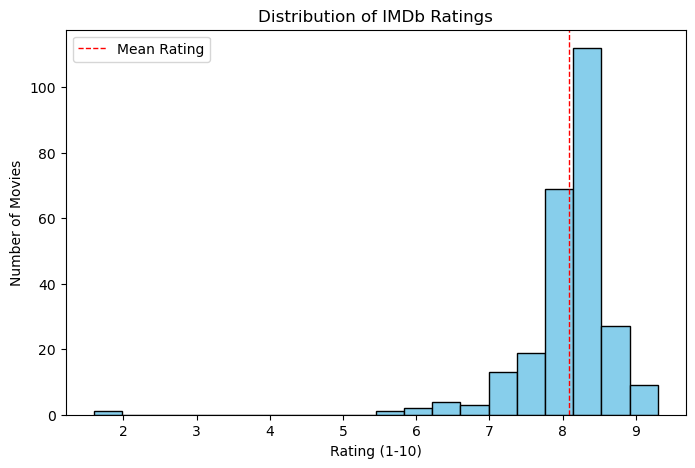

Training Model...
✅ Model Trained!

Model Error (MSE): 0.3108

   MOVIE ANALYSIS SYSTEM
1. Predict Rating for a Plot
2. Add New Movie Data
3. View Dataset Stats
4. Exit



Select an Option (1-4):  1



--- PREDICT MOVIE RATING ---


Enter the Movie Plot/Description:  1



🎬 Predicted IMDb Rating: 8.1/10
Sentiment: MASTERPIECE (Positive)

   MOVIE ANALYSIS SYSTEM
1. Predict Rating for a Plot
2. Add New Movie Data
3. View Dataset Stats
4. Exit



Select an Option (1-4):  intersellar


Invalid option, try again.

   MOVIE ANALYSIS SYSTEM
1. Predict Rating for a Plot
2. Add New Movie Data
3. View Dataset Stats
4. Exit



Select an Option (1-4):  8.5


Invalid option, try again.

   MOVIE ANALYSIS SYSTEM
1. Predict Rating for a Plot
2. Add New Movie Data
3. View Dataset Stats
4. Exit



Select an Option (1-4):  3



Current Movie Count: 260
Average Rating: 8.09

   MOVIE ANALYSIS SYSTEM
1. Predict Rating for a Plot
2. Add New Movie Data
3. View Dataset Stats
4. Exit



Select an Option (1-4):  2



--- ADD YOUR OWN MOVIE ---


Movie Title:  INTERSELLAR
Movie Plot:  In a dystopian future where humanity is struggling to survive as Earth becomes uninhabitable due to crop blight and dust storms, a group of astronauts is recruited for a desperate mission. Led by former NASA pilot Cooper, they travel through a newly discovered wormhole near Saturn to search for a new home for mankind among three potentially habitable planets. As they traverse space and time, facing black holes and relativity, Cooper must decide between seeing his children again and saving the human race.
How was the movie? (Enter Rating 0-10):  8.5


✅ Added 'INTERSELLAR' to the dataset temporarily!
New Dataset Size: 261

   MOVIE ANALYSIS SYSTEM
1. Predict Rating for a Plot
2. Add New Movie Data
3. View Dataset Stats
4. Exit



Select an Option (1-4):  1



--- PREDICT MOVIE RATING ---


Enter the Movie Plot/Description:  nasa pilot cooper travel throgh space and they discover wolrmhole near saturn



🎬 Predicted IMDb Rating: 8.1/10
Sentiment: MASTERPIECE (Positive)

   MOVIE ANALYSIS SYSTEM
1. Predict Rating for a Plot
2. Add New Movie Data
3. View Dataset Stats
4. Exit



Select an Option (1-4):  1



--- PREDICT MOVIE RATING ---


Enter the Movie Plot/Description:  In a dystopian future where humanity is struggling to survive as Earth becomes uninhabitable due to crop blight and dust storms, a group of astronauts is recruited for a desperate mission. Led by former NASA pilot Cooper, they travel through a newly discovered wormhole near Saturn to search for a new home for mankind among three potentially habitable planets. As they traverse space and time, facing black holes and relativity, Cooper must decide between seeing his children again and saving the human race.



🎬 Predicted IMDb Rating: 7.9/10
Sentiment: GOOD/AVERAGE (Neutral)

   MOVIE ANALYSIS SYSTEM
1. Predict Rating for a Plot
2. Add New Movie Data
3. View Dataset Stats
4. Exit



Select an Option (1-4):  3



Current Movie Count: 261
Average Rating: 8.09

   MOVIE ANALYSIS SYSTEM
1. Predict Rating for a Plot
2. Add New Movie Data
3. View Dataset Stats
4. Exit



Select an Option (1-4):  4


Exiting...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

file_name = 'tmdb_top260_with_imdb.csv'
try:
    df = pd.read_csv(r"C:\Users\Pavilion\ML PROJECTS\tmdb_top260_with_imdb.csv")
    print("✅ Dataset Loaded Successfully!")
except FileNotFoundError:
    print(f" Error: File '{'tmdb_top260_with_imdb.csv'}' not found. Please upload it.")

print(f"Dataset Shape: {df.shape}")
print(df[['Title', 'IMDb Rating', 'Plot']].head())

df = df.dropna(subset=['Plot', 'IMDb Rating'])

plt.figure(figsize=(8, 5))
plt.hist(df['IMDb Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating (1-10)')
plt.ylabel('Number of Movies')
plt.axvline(df['IMDb Rating'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Rating')
plt.legend()
plt.show()

X = df['Plot']
y = df['IMDb Rating']

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_vectors = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

print("Training Model...")
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Trained!")

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"\nModel Error (MSE): {mse:.4f}")


def predict_movie_rating():
    """Predicts rating based on a plot description entered by the user."""
    print("\n--- PREDICT MOVIE RATING ---")
    user_plot = input("Enter the Movie Plot/Description: ")
    
    user_vec = vectorizer.transform([user_plot])
    pred_score = model.predict(user_vec)[0]
    pred_score = max(0, min(10, pred_score))
    
    print(f"\n🎬 Predicted IMDb Rating: {pred_score:.1f}/10")
    if pred_score > 8.0:
        print("Sentiment: MASTERPIECE (Positive)")
    elif pred_score > 6.0:
        print("Sentiment: GOOD/AVERAGE (Neutral)")
    else:
        print("Sentiment: POOR (Negative)")

def add_user_data():
    """Simulates adding user data to the dataset."""
    print("\n--- ADD YOUR OWN MOVIE ---")
    title = input("Movie Title: ")
    plot = input("Movie Plot: ")
    
    while True:
        try:
            rating = float(input("How was the movie? (Enter Rating 0-10): "))
            if 0 <= rating <= 10:
                break
            print("Please enter a number between 0 and 10.")
        except ValueError:
            print("Invalid input. Enter a number.")
    new_row = pd.DataFrame({'Title': [title], 'Plot': [plot], 'IMDb Rating': [rating]})
    global df # Access the global dataframe
    df = pd.concat([df, new_row], ignore_index=True)
    
    print(f"Added '{title}' to the dataset temporarily!")
    print(f"New Dataset Size: {df.shape[0]}")

# --- MAIN MENU ---
while True:
    print("\n==============================")
    print("   MOVIE ANALYSIS SYSTEM")
    print("==============================")
    print("1. Predict Rating for a Plot")
    print("2. Add New Movie Data")
    print("3. View Dataset Stats")
    print("4. Exit")
    
    choice = input("\nSelect an Option (1-4): ")
    
    if choice == '1':
        predict_movie_rating()
    elif choice == '2':
        add_user_data()
    elif choice == '3':
        print(f"\nCurrent Movie Count: {len(df)}")
        print(f"Average Rating: {df['IMDb Rating'].mean():.2f}")
    elif choice == '4':
        print("Exiting...")
        break
    else:
        print("Invalid option, try again.")